# Scipy

SciPy refers to several related but distinct entities:

* The SciPy ecosystem, a collection of open source software for scientific computing in Python.
* The community of people who use and develop this stack.
* Several conferences dedicated to scientific computing in Python - SciPy, EuroSciPy and SciPy.in.
* The SciPy library, one component of the SciPy stack, providing many numerical routines.

#### The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization. (https://docs.scipy.org/doc/scipy/reference/)

SciPy is a collection of mathematical algorithms and convenience functions built on the **Numpy** extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.

* Clustering package (scipy.cluster)
* Constants (scipy.constants)
* Discrete Fourier transforms (scipy.fftpack)
* Integration and ODEs (scipy.integrate)
* **Interpolation (scipy.interpolate)**
* Input and output (scipy.io)
* Linear algebra (scipy.linalg)
* Miscellaneous routines (scipy.misc)
* Multi-dimensional image processing (scipy.ndimage)
* Orthogonal distance regression (scipy.odr)
* Optimization and root finding (scipy.optimize)
* Signal processing (scipy.signal)
* Sparse matrices (scipy.sparse)
* Sparse linear algebra (scipy.sparse.linalg)
* Compressed Sparse Graph Routines (scipy.sparse.csgraph)
* Spatial algorithms and data structures (scipy.spatial)
* Special functions (scipy.special)
* **Statistical functions (scipy.stats)**
* Statistical functions for masked arrays (scipy.stats.mstats)
* Low-level callback functions

## Interpolação

A classe `interp1d` permite que a partir de um conjunto de pontos nós possamos criar uma função de interpolação dentro desse domínio. Por exemplo:

In [9]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
% matplotlib inline

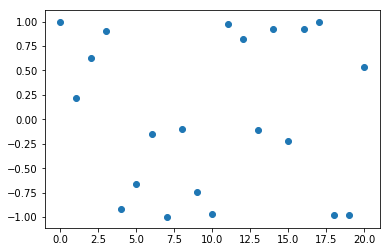

In [24]:
x = np.linspace(0, 20, 21)
y = np.cos((x * np.pi) ** 2 / 2)

plt.scatter(x, y)

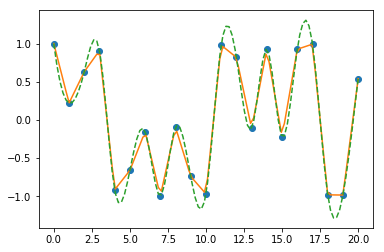

In [27]:
# função de interpolação default linear
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 20, 100)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')

Agora vamos tentar interpolar um campo de duas dimensões

In [29]:
from scipy.interpolate import griddata

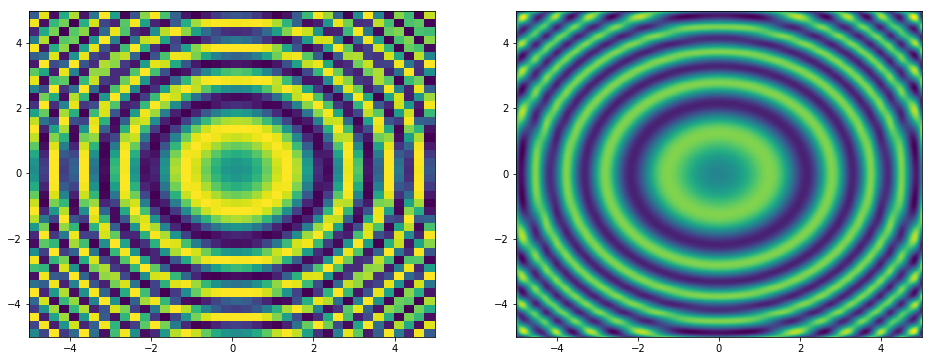

In [78]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)

z = np.sin(xx**2+yy**2)

# aumentamos a grade para pontos a cada 0.01
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
xxnew, yynew = np.meshgrid(xnew, ynew)

f = interp2d(x, y, z, kind='cubic')

znew = f(xnew, ynew)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,6))

ax1.pcolormesh(xx, yy, z)
ax2.pcolormesh(xxnew, yynew, znew)

E se tivessemos dados não estruturados, como por exemplo estações?

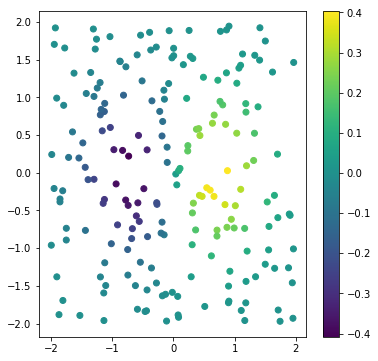

In [85]:
npts = 200

# pontos (coordeanadas)
x = np.random.uniform(-2,2,npts)
y = np.random.uniform(-2,2,npts)
# valor no dado ponto (ex: temperatura)
z = x*np.exp(-x**2-y**2)

fig, ax = plt.subplots(figsize=(6,6))

cf = ax.scatter(x, y, c=z)
fig.colorbar(cf, ax=ax)

In [43]:
from scipy.interpolate import griddata

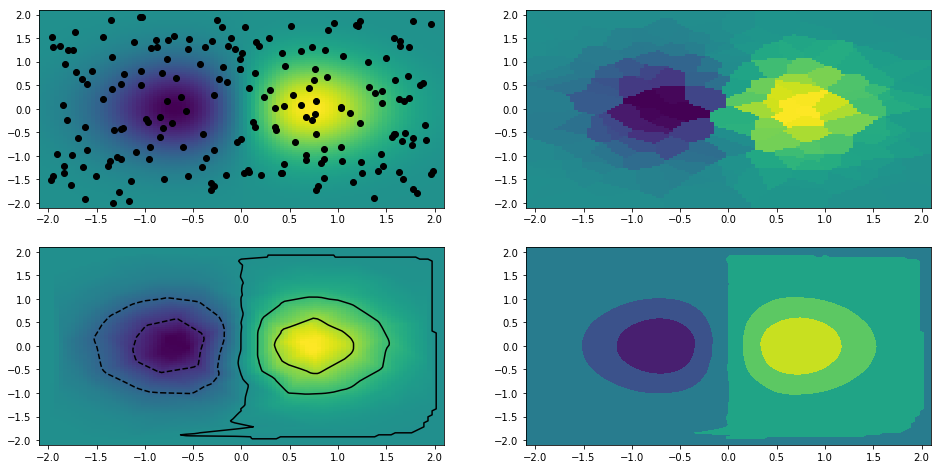

In [84]:
# minha grade
xi = np.linspace(-2.1,2.1,100)
yi = np.linspace(-2.1,2.1,100)
xx, yy = np.meshgrid(xi, yi)

grid_z0 = griddata((x, y), z, (xx, yy), method='nearest')
grid_z1 = griddata((x, y), z, (xx, yy), method='linear', fill_value=0)
grid_z2 = griddata((x, y), z, (xx, yy), method='cubic', fill_value=0)

fig, axarr = plt.subplots(2, 2, figsize=(16,8))

axarr[0, 0].pcolormesh(xx, yy, xx*np.exp(-xx**2-yy**2))
axarr[0, 0].scatter(x, y, color='k')
axarr[0, 1].pcolormesh(xx, yy, grid_z0)
axarr[1, 0].pcolormesh(xx, yy, grid_z1)
axarr[1, 0].contour(xx, yy, grid_z1, colors='k')
axarr[1, 1].contourf(xx, yy, grid_z2)